In [ ]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import math

# Homework 2
## Hypothesis testing

Maximum number of points for this hometask is 10. Some tasks allow you to get a bonus point, that **can not** increase your total score for the homework beyond the maximum, but can compensate for some occasionally lost points.

### Task 1 (1.5 points)

A randomized, double-blind experiment was conducted to assess the
effectiveness of several drugs for reducing postoperative nausea. The
data are as follows:

In [66]:
df1 = pd.DataFrame({'Drug': ['Placebo', 'Chlorpromazine', 'Dimenhydrinate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
                    'Number of Patients': [80, 75, 85, 67, 85],
                    'Incidence of Nausea': [45, 26, 52, 35, 37]})
df1

,Drug,Number of Patients,Incidence of Nausea
0,Placebo,80,45
1,Chlorpromazine,75,26
2,Dimenhydrinate,85,52
3,Pentobarbital (100 mg),67,35
4,Pentobarbital (150 mg),85,37


Test each drug versus the placebo at the 5 per cent level. Also, report
the estimated odds–ratios. Summarize your findings. (1.5 points)
*Hint*. Use simple $H_0$: "$p = p_0$".

**Solution:**

Рассмотрим нулевую гипотезу следующего вида:

$H_0: p = p_0$, где $p_0$ - это вероятность тошноты при приёме плацебо, а $p$ - вероятность тошноты при приёме изучаемого лекарства. Равеноство вероятностей для распределения Бернулли по сути равносильно равенству распределений, поэтому в данном случае можно применить permutation test. 

In [106]:
def compute_permutation_metric (array, n, metric):
    if metric == "mean":
        array1 = array[:n]
        array2 = array[n:]
        mean1 = np.mean (array1)
        mean2 = np.mean (array2) 
        return abs (mean2 - mean1)
    elif metric == "percentile20oneside":
        array1 = array[:n]
        array2 = array[n:]
        percentile1 = np.percentile (array1, 20)
        percentile2 = np.percentile (array2, 20)
        return percentile2 - percentile1  
    elif metric == "percentile20":
        array1 = array[:n]
        array2 = array[n:]
        percentile1 = np.percentile (array1, 20)
        percentile2 = np.percentile (array2, 20)
        return abs (percentile2 - percentile1)        
    else:
        print ("Incorrect metric name: {}".format (metric))
        exit (-1)


def permutation_test (x_samples, y_samples, num_samples, metric):
    all_samples = np.concatenate ([x_samples, y_samples])
    initial_value = compute_permutation_metric (all_samples, x_samples.size, metric)
    permutations = set ()
    metric_array = np.zeros (num_samples)
    for num in range (num_samples):
        while 1:
            permutation = np.random.permutation (all_samples)
            if tuple (permutation) not in permutations:
                permutations.add (tuple (permutation))
                metric_array[num] = compute_permutation_metric (permutation, x_samples.size, metric)
                break
    top = (metric_array > initial_value).sum ()
    bottom = metric_array.size
    return top / bottom

In [84]:
N = 10000
num_drugs = 4

placebo_samples = np.array ([1 if ind < df1["Incidence of Nausea"][0] else 0 for ind in range (df1["Number of Patients"][0])])
samples1 = np.array ([1 if ind < df1["Incidence of Nausea"][1] else 0 for ind in range (df1["Number of Patients"][1])])
samples2 = np.array ([1 if ind < df1["Incidence of Nausea"][2] else 0 for ind in range (df1["Number of Patients"][2])])
samples3 = np.array ([1 if ind < df1["Incidence of Nausea"][3] else 0 for ind in range (df1["Number of Patients"][3])])
samples4 = np.array ([1 if ind < df1["Incidence of Nausea"][4] else 0 for ind in range (df1["Number of Patients"][4])])


p_values = [permutation_test (placebo_samples, samples1, N, "mean"), permutation_test (placebo_samples, samples2, N, "mean"), permutation_test (placebo_samples, samples3, N, "mean"),
            permutation_test (placebo_samples, samples4, N, "mean")]


for ind in range (0, num_drugs):
    print ("p_value{} = {}".format (ind + 1, p_values[ind]))



p_value1 = 0.006
p_value2 = 0.4285
p_value3 = 0.6278
p_value4 = 0.0833


По полученным результатам можно сказать, что для лекарства Chlorpromazine	можно отклонить нулевую гипотезу, так как для него p_value ниже порога. В свою очередь, для остальных лекарств мы не можем опровергнуть нулевую гипотезу, так как p_value выше порога.

Теперь оценим odds ratio по формуле:
$R = \frac{D_d}{H_d}/\frac{D_p}{H_p}$, where $D_d$ - number of people with nausea after taking a drug; $H_d$ - number of people without nausea after taking a drug; $D_p$  number of people with nausea after taking a placebo; $H_d$ - number of people without nausea after taking a placebo;

In [107]:
def compute_odds_ratio (k1, n1, k2, n2):
    return (k1 * n2) / (n1 * k2)

In [108]:
ratios = [0] * num_drugs

for ind in range (num_drugs):
    ratios[ind] = compute_odds_ratio (df1["Incidence of Nausea"][ind + 1], df1["Number of Patients"][ind + 1] - df1["Incidence of Nausea"][ind + 1], df1["Incidence of Nausea"][0], df1["Number of Patients"][0] - df1["Incidence of Nausea"][0])
print (ratios)

[0.4126984126984127, 1.2255892255892256, 0.8506944444444444, 0.5995370370370371]


Из результатов видно, что chlorpromazine эффективен при лечении тошноты, так как его odds ratio меньше единицы, а p_value меньше порога. В свою очередь, dimenhydrinate неэффективен при лечении тошноты, так как его odds-ratio больше единицы. Эффективность двух других лекарств не подтверждена, так как их odds ratio меньше единицы, а p_value выше порога.

### Task 2: permutation test (2 points)

For this task we will use the famous Iris dataset, originaly studied by R.A. Fisher himself.

In [120]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will select two species: *setosa* and *virginica* and study the sepal length.

In [121]:
X = iris[iris.species == 'setosa']['sepal_width'].values
Y = iris[iris.species == 'virginica']['sepal_width'].values

Test the hypothesis $H_0$: quantile of level 0.2 (20 percentile, lower 20%) of the sepal length of *setosa* flowers is  larger than that of *virginica* flowers. Use permutation test, approximate the full permutation distribution with 10,000 samples. 


**Solution:**

Применим permutation test для нулевой гипотезы из задания.

In [122]:
p_value = permutation_test (X, Y, N, "percentile20oneside")
print (np.percentile (X, 20))
print (np.percentile (Y, 20))
print (np.mean (X))
print (np.mean (Y))
print ("p_value = {}".format (p_value))

3.1
2.7
3.428
2.974
p_value = 1.0


Результаты показывают, что p_value очень велико, что не позволяет на отбросить нулевую гипотезу. 

Теперь применим permutation test для нулевой гипотезе о равенстве квантилей sepal length для двух цветов.  

In [123]:
p_value = permutation_test (X, Y, N, "percentile20")
print (p_value)

0.0


Как видно, значение p_value меньше чем $0.05$, что позволяет нам опровергнуть вторую нулевую гипотезу.

В таком случае рассмотрим третью нулевую гипотезу о том что sepal length для virginica больше чем sepal length для setosa.

In [124]:
p_value = permutation_test (Y, X, N, "percentile20oneside")
print (p_value)

0.0


Как видно, p_value опять меньше $0.05$, что позволяет нам отвергнуть третью нулевую гипотезу. В итоге из результатов можно заключить, что нулевая гипотеза из условия верна.

### Task 3: computational approach to hypothesis testing

STRONGLY Recommended reading: http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html

Consider the following dataset (service hours between failures of the air-conditioning equipment in a Boeing 720 jet aircraft , Proschan, 1963):

In [105]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import math

Y = np.array([3, 5, 7, 18, 43, 85, 91, 98, 100, 130, 230, 487])

This sample was sorted for easier presentation.

1. Compute an estimate of the median time between failures (1 point)
2. Consider the null hypothesis $H_0$ to be: "median time between failures is one week" (1 point)
3. What distribution will you choose for this kind of data under $H_0$? (1 point)
4. Choose a statistic to measure the deviation from $H_0$ (effect size) (1 point)
5. Check whether you can reject $H_0$ at significance level 5% and calculate the corresponding approximate $p$-value. Use 10,000 simulations for your experiment (1 point)
6. Plot histogram of simulated effect sizes and mark the observed effect size (1 bouns point)

**Solution:**

1) - Будем оценивать медиану по формуле:

$$T(X^n) =  \arg\max_m \{\sum\limits_{k=1}^n |X_k - m|\}$$ 

In [3]:


initial_median = np.median (Y)
print (initial_median)

88.0


Медиана равна 88

2, 3) - Так как представленные данные - это часы между поломками, то они не могут быть отрицательными. Следовательно, необходимо выбрать распределние, плотность вероятности которого равна нулю при отрицательных значениях x. Такому свойству удовлетворяет экспоненциальное распределение, поэтому его и выберем в качестве предполагаемого распределения. Тогда нулевая гипотеза будет иметь вид:

$H_0$ : Данные сгенерированы экспоненциальным распределением с медианой равной 168

4) - В качестве статистики для измерения отклонения от $H_0$ будем использовать следующую статистику:

$$D(X^n) = |T(X^n) - 168|,$$
где $T(X^n)$ была определена в пункте (1)

5) - Теперь с помощью экспоненциального распределения из нулевой гипотезы сгенерируем $N = 10000$ выборок того же размера, что и исходная. Для каждой выборки посчитаем медиану и найдём долю выборок, где рассчитанное значение медианы оказалось больше медианы для иходной выборки. Полученная доля будет оценкой p_value. Для экспоненциального распределения матожидание равно $\lambda = \frac{m}{ln (2)}$, где $m$ - медиана экспоненциального распределения.

In [8]:
median = 168
num_samples = 10000
medians = np.array ([np.median (np.random.exponential (median / np.log (2), Y.size)) for k in range (num_samples)])
D_values = abs (medians - median)
top_part = (D_values >= abs (initial_median - median)).sum ()
print ("p_value = {}".format (top_part / num_samples))


p_value = 0.2146


Как видно, полученное значение p_value недостаточно, чтобы отклонить нулевую гипотезу так как оно больше 0.05.

6) - Для выборок, полученных с помощью симуляции, посчитаем количество случаев, в которых $D(X^n)$ находится в интервалах [0, 1), [1, 2), [2, 3) и т.д. Далее построим гистограмму, где по оси OX отложим нижнее значение интервала, а по оси OY число случаев попадания в данный интервал. 

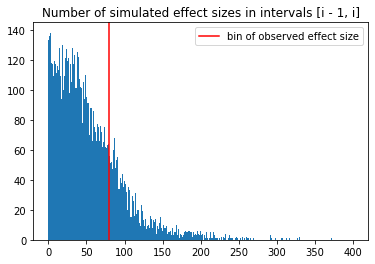

In [43]:
ind = 0
histogram_data = []
processed_cases = 0
total_size = D_values.size
while (1):
    if processed_cases == total_size:
        break
    array_left = (ind <= D_values)
    array_right = (D_values < ind + 1)
    num_cases = np.logical_and (array_left, array_right).sum ()
    for k in range (num_cases):
        histogram_data.append (ind)
    processed_cases += num_cases
    ind += 1


plt.axvline(abs (median - initial_median), 0, 140, label='bin of observed effect size', color='r')
plt.hist(histogram_data, bins=400, range=(0, 400))
plt.title("Number of simulated effect sizes in intervals [i - 1, i]")
plt.legend()
plt.show()

### Task 4: power analysis

In 1861, 10 essays appeared in the New Orleans Daily Crescent. They
were signed “Quintus Curtius Snodgrass” and some people suspected
they were actually written by Mark Twain. To investigate this, we will
consider the proportion of three letter words found in an author’s work.
From eight Twain essays we have:

In [125]:
X = np.array([.225, .262, .217, .240, .230, .229, .235, .217])

From 10 Snodgrass essays we have:

In [126]:
Y = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

1. Perform a Wald test for equality of the means. Use the nonparametric plug-in estimator. Report the p-value and a 95 per cent confidence
interval for the difference of means. What do you conclude? (1.5 points)
2. Now use a permutation test to avoid the use of large sample methods.
What is your conclusion? (Brinegar (1963)) (1.5 bonus points)
3. Assume that samples do indeed come from different populations. Additionally, observed sample means and variaces for the two samples are equal to the true values for the respective population. Estimate the power of the two tests above under two model distributions for the data: Normal and [Beta](https://en.wikipedia.org/wiki/Beta_distribution) (2 bonus points)

**Solution:**

1) - Предположим, что $\hat{X}$ и $\hat{Y}$ - это средние значения двух выборок; $s_1^2$ и $s_2^2$ - это дисперсии двух выборок;  $\hat{\delta} = \hat{X} - \hat{Y}$;

$$\hat{se} = \sqrt{\frac{s_1^2}{m} + \frac{s_2^2}{n}},$$ где $m$ - число элементов в первой выборке, а $n$ - во второй; 

$$W = \frac{\hat{\delta}}{\hat{se}}.$$

Тогда в соответствии с тестом Вальда нулевая гипотеза о равенстве средних значений двух выборок отклоняется, если $|W| > z_{\alpha/2}$, где $z_{\alpha/2} = 𝚽^{-1}(1 - \alpha / 2)$, а $𝚽$ - функция распределения для стандартного нормального распределения, $\alpha$ - уровень значимости.

In [127]:
mean1 = np.mean (X)
mean2 = np.mean (Y)
var1 = np.var (X)
var2 = np.var (Y)
se = np.sqrt (var1 / X.size + var2 / Y.size)
W = abs (mean1 - mean2) / se
sign_level = 0.05

z = scipy.stats.norm.ppf (1 - sign_level / 2.)

print ("W = {}".format (W))
print ("z = {}".format (z))
print ("The null hypothesis is {}".format (W <= z))

W = 3.9446199162650353
z = 1.959963984540054
The null hypothesis is False


Тест Вальда отвергает нулевую гипотезу $H_0 : \hat{\delta} = 0$ в пользу $H_1 : \hat{\delta} \neq 0$ тогда и только тогда когда 0 не принадлежит интервалу:

$$C_n = (\hat{\delta} - \hat{se}\cdot z_{\alpha/2}, \hat{\delta} + \hat{se}\cdot z_{\alpha/2}).$$

In [128]:
delta = mean1 - mean2
print ("Confidence interval is ({}, {})".format (delta - se * z, delta + se * z))

Confidence interval is (0.011156903889404914, 0.03319309611059509)


Как видно, нуль не принадлежит этому интервалу, что служит основанием для отклонения нулевой гипотезы.

В свою, очередь p_value для теста Вальда можно рассчитать по следующей формуле:
$$p\_value = 2𝚽 (-|w|),$$
где 
$$w = \frac{\hat{\delta} - 0}{\hat{se}}$$

In [129]:
from scipy.stats import norm

w = delta / se
p_value = 2. * norm.cdf (-abs(w))
print ("p_value = {}".format (p_value))

p_value = 7.9926649561458e-05


Как видно, p_value меньше чем $0.05$, что в третий раз подтверждает, что по критерию Вальда нулевую гипотезу следует отвергнуть.

2) - Теперь применим permutation test.

In [130]:
N = 10000
print ("p_value = {}".format (permutation_test (X, Y, N, "mean")))

p_value = 0.0006


Как видно, значение p_value меньше $0.05$. Это означает, что permutation test также отвергает нулевую гипотезу. 

3) - Мощность теста определяется следующей формулой:

$$W(F) = P (X^n \in \chi | F),$$

где $\chi$ - критическая область, а $F$ - функция распределения. Для вычисления этой мощности теста численным методом достаточно нагенерировать много пар sample-ов для распределений из условия, а затем найти долю пар sample-ов для которых критерии не выполнены. Сперва выполним эту процедуру для нормального распределния: 

In [136]:
def vald_test (X, Y, sign_level):
    mean1 = np.mean (X)
    mean2 = np.mean (Y)
    var1 = np.var (X)
    var2 = np.var (Y)
    se = np.sqrt (var1 / X.size + var2 / Y.size)
    W = abs (mean1 - mean2) / se
    z = scipy.stats.norm.ppf (1 - sign_level / 2.)
    return (W > z)

In [137]:


vald_test_results = np.array ([vald_test (np.random.normal (mean1, np.sqrt (var1), X.size), np.random.normal (mean2, np.sqrt (var2), Y.size), sign_level) for k in range (N)])
print ("Wald's test power for the normal distribution = {}".format (vald_test_results.sum () / vald_test_results.size))

Wald's test power for the normal distribution = 0.978


In [138]:
permutation_test_results = np.array ([permutation_test (np.random.normal (mean1, np.sqrt (var1), X.size), np.random.normal (mean2, np.sqrt (var2), Y.size), N, "mean") for k in range (N // 100)])
top_value = (permutation_test_results < 0.05).sum ()
print ("Permutation test power for the normal distribution = {}".format (top_value / permutation_test_results.size))

Permutation test power for the normal distribution = 0.96


Теперь выполним ту же процедуру для $\beta$-распределения. Математическое ожидание для $\beta$ распределения вычисляется по следующей формуле:

$$\mu = \frac{\alpha}{\alpha + \beta},$$

где $\alpha$ и $\beta$ - параметры $\beta$ распределения. Дисперсия вычисляется по следующей формуле:

$$V = \frac{\alpha\beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.$$

Из этого легко получить, что:

$$\alpha = \mu\bigg(\frac{\mu (1 - \mu)}{V} - 1\bigg)$$

$$\beta = (1 - \mu)\bigg(\frac{\mu (1 - \mu)}{V} - 1\bigg)$$

In [140]:
alpha1 = mean1 * (mean1 * (1 - mean1) / var1 - 1)
beta1 = (1 - mean1) * (mean1 * (1 - mean1) / var1 - 1)
alpha2 = mean2 * (mean2 * (1 - mean2) / var2 - 1)
beta2 = (1 - mean2) * (mean2 * (1 - mean2) / var2 - 1)

In [141]:
vald_test_results = np.array ([vald_test (np.random.beta (alpha1, beta1, X.size), np.random.beta (alpha2, beta2, Y.size), sign_level) for k in range (N)])
print ("Wald's test power for the beta distribution = {}".format (vald_test_results.sum () / vald_test_results.size))

Wald's test power for the beta distribution = 0.9805


In [142]:
permutation_test_results = np.array ([permutation_test (np.random.beta (alpha1, beta1, X.size), np.random.beta (alpha2, beta2, Y.size), N, "mean") for k in range (N // 100)])
top_value = (permutation_test_results < 0.05).sum ()
print ("Permutation test power for the beta distribution = {}".format (top_value / permutation_test_results.size))

Permutation test power for the beta distribution = 1.0
